In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# 1. Load Data
# Use your specific file path and pd.read_excel()
file_name = '/content/Linear Regression DT.xlsx'
dataset = pd.read_excel(file_name)
print(dataset.head())


   Size_sqft  Bedrooms  Age_years  Price_thousands
0       1680         3         10           348.65
1       2436         5         34           449.25
2       2000         4          2           367.87
3       2458         5         22           464.33
4       2183         3         31           390.22


In [ ]:
# --- START: Missing Value Handling ---

print("--- Checking for Missing Values (Before) ---")
print(dataset.isnull().sum())

# Get list of numeric columns
numeric_cols = dataset.select_dtypes(include=np.number).columns
# Fill missing values with the mean only for numeric columns
dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())

print("\n--- Checking for Missing Values (After Filling) ---")
print(dataset.isnull().sum())

# --- END: Missing Value Handling ---


--- Checking for Missing Values (Before) ---
Size_sqft          0
Bedrooms           0
Age_years          0
Price_thousands    0
dtype: int64

--- Checking for Missing Values (After Filling) ---
Size_sqft          0
Bedrooms           0
Age_years          0
Price_thousands    0
dtype: int64


In [ ]:
# 2. Define Features (X) and Target (y)
feature_cols = ['Size_sqft', 'Bedrooms', 'Age_years']
X = dataset[feature_cols]
y = dataset['Price_thousands']

# Print samples to show the result
print("--- Features (X) Sample ---")
print(X.head())

print("\n--- Target (y) Sample ---")
print(y.head())

--- Features (X) Sample ---
   Size_sqft  Bedrooms  Age_years
0       1680         3         10
1       2436         5         34
2       2000         4          2
3       2458         5         22
4       2183         3         31

--- Target (y) Sample ---
0    348.65
1    449.25
2    367.87
3    464.33
4    390.22
Name: Price_thousands, dtype: float64


In [ ]:
# 3. Split Data (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print(f"Total rows in original dataset: {len(dataset)}")
print(f"Shape of X_train (80% features): {X_train.shape}")
print(f"Shape of y_train (80% target):  {y_train.shape}")
print(f"Shape of X_test (20% features):  {X_test.shape}")
print(f"Shape of y_test (20% target):   {y_test.shape}")

Total rows in original dataset: 50
Shape of X_train (80% features): (40, 3)
Shape of y_train (80% target):  (40,)
Shape of X_test (20% features):  (10, 3)
Shape of y_test (20% target):   (10,)


In [ ]:

# 4. Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:

# 5. Make Predictions
y_pred = model.predict(X_test)

In [ ]:

# 6. Evaluate Performance
print('--- Evaluation Metrics ---')
print('R-squared (R²):', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))

--- Evaluation Metrics ---
R-squared (R²): 0.8676639813695152
Mean Absolute Error (MAE): 16.741216921835303
Root Mean Squared Error (RMSE): 23.2757950652086
Mean Squared Error (MSE): 541.7626359175891


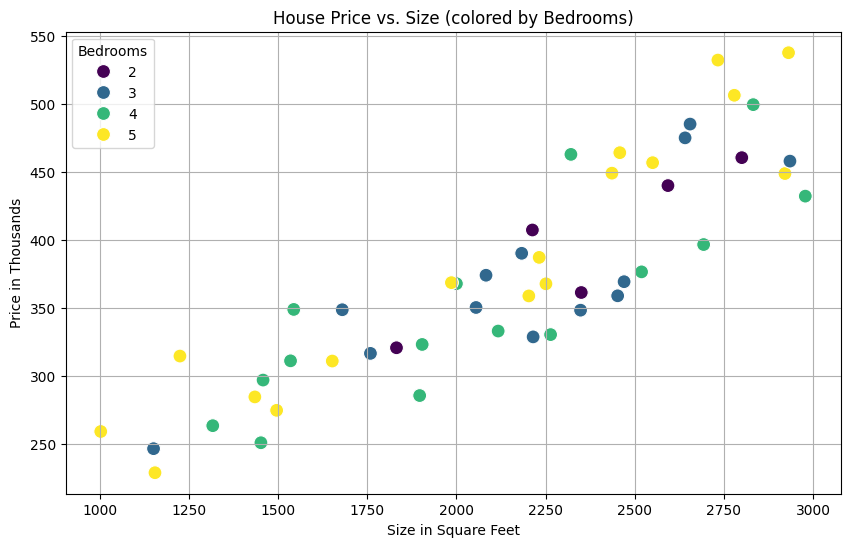

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='Size_sqft', y='Price_thousands', hue='Bedrooms', palette='viridis', s=100)
plt.title('House Price vs. Size (colored by Bedrooms)')
plt.xlabel('Size in Square Feet')
plt.ylabel('Price in Thousands')
plt.grid(True)
plt.show()